In [1]:
""" Fit a distribution to Expert's CDF """
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
# Expert's CDF data points
xdata = [  10,   20,   28,   38,   50,   65 ]
ydata = [0.09, 0.30, 0.51, 0.72, 0.91, 0.98 ]

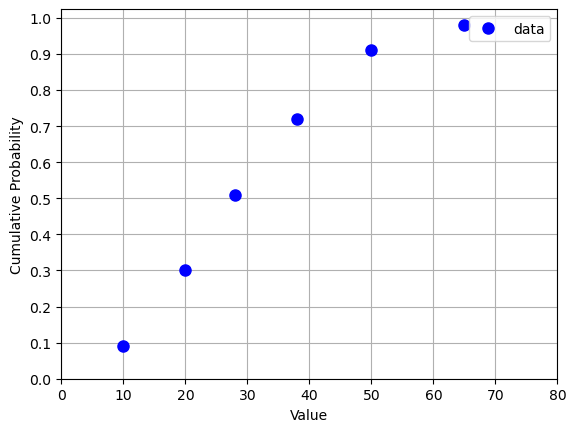

In [3]:
# Visualize the data points
fig0, ax0 = plt.subplots()
ax0.plot(xdata, ydata, 'bo', ms=8, label='data')
ax0.set_xlim(0, 80)
ax0.set_yticks(np.linspace(0, 1, 11))
ax0.set_ylabel("Cumulative Probability")
ax0.set_xlabel("Value")
ax0.grid()
ax0.legend()
plt.show()

In [4]:
# Firt, try fitting a Normal Distribution
# The CDF to fit
fnorm = lambda x,mu,sigma: scipy.stats.norm(loc=mu, scale=sigma).cdf(x)

# Fit the data
popt, pcov = scipy.optimize.curve_fit(fnorm, xdata, ydata, p0=(50,10))
print(f"\nFitted Normal distribution N({popt[0]:.4f},{popt[1]:.4f})")
print(f"Mean = {scipy.stats.norm(*popt).mean():.4f}")
print(f"Std Dev = {scipy.stats.norm(*popt).std():.4f}")


Fitted Normal distribution N(28.4258,15.4810)
Mean = 28.4258
Std Dev = 15.4810


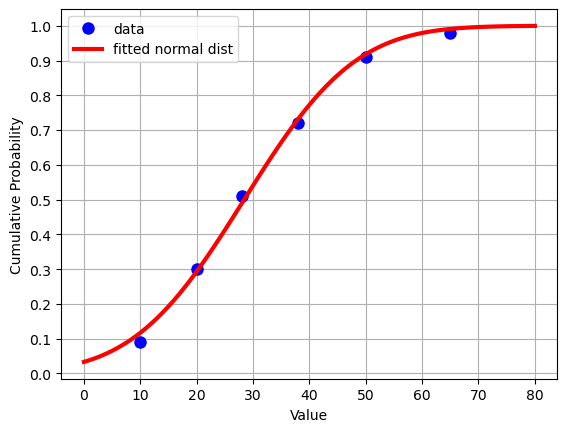

In [5]:
# Visualize the fitted distribution against the data
xfit = np.linspace(0, 80, 81)
yfit1 = fnorm(xfit, *popt)
fig1, ax1 = plt.subplots()
ax1.plot(xdata, ydata, 'bo', ms=8, label='data')
ax1.plot(xfit,  yfit1, 'r-', lw=3, label='fitted normal dist' )
ax1.set_yticks(np.linspace(0,1,11))
ax1.set_ylabel("Cumulative Probability")
ax1.set_xlabel("Value")
ax1.grid()
ax1.legend()
plt.show()

In [6]:
# Try fitting a beta distribution and compare it with the normal distribution
# The CDF to fit
fbeta = lambda x, a, b, L, S: scipy.stats.beta(a,b,loc=L,scale=S).cdf(x)

# Fit the data
popt, pcov = scipy.optimize.curve_fit(fbeta, xdata, ydata, p0=(3, 7, 0, 100))
print("\n\nFitted Beta distribution with parameters:",
      ', '.join(f"{p:.2f}" for p in popt))
print(f"Mean = {scipy.stats.beta(*popt).mean():.4f}")
print(f"Std Dev = {scipy.stats.beta(*popt).std():.4f}")



Fitted Beta distribution with parameters: 2.84, 5.93, -3.12, 99.79
Mean = 29.2084
Std Dev = 14.9350


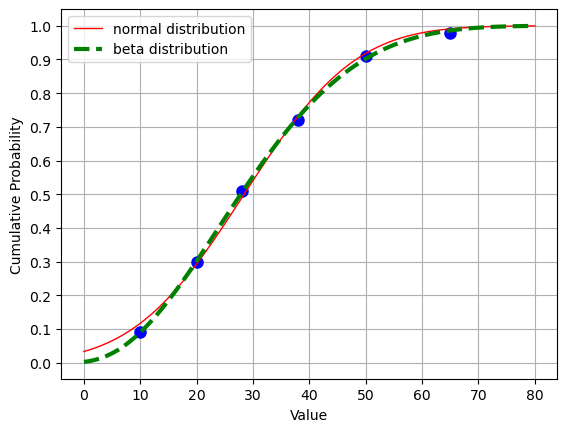

In [7]:
# Visualize the fitted distribution against the data
yfit2 = fbeta(xfit, *popt)
fig2, ax2 = plt.subplots()
ax2.plot(xdata, ydata, 'bo', ms=8)
ax2.plot(xfit,  yfit1, 'r-',  lw=1, label="normal distribution") 
ax2.plot(xfit,  yfit2, 'g--', lw=3, label="beta distribution")
ax2.set_yticks(np.linspace(0,1,11))
ax2.set_ylabel("Cumulative Probability")
ax2.set_xlabel("Value")
ax2.legend()
ax2.grid()
plt.show()


PDF of fitted Beta distribution


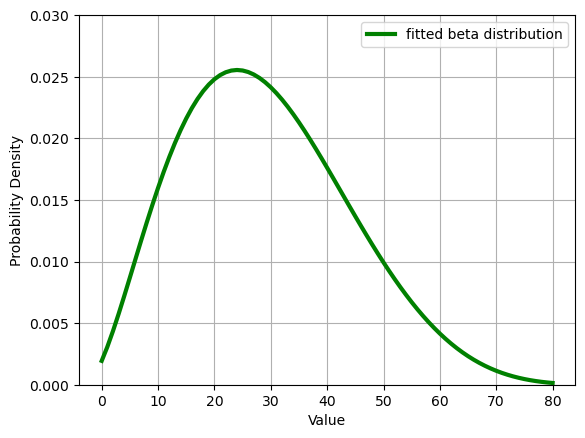

In [8]:
# Finally, plot the PDF of the fitted beta distribution
print("\nPDF of fitted Beta distribution")
fbeta_pdf = lambda x, a, b, L, S: scipy.stats.beta(a,b,loc=L,scale=S).pdf(x)
yfit2pdf = fbeta_pdf(xfit, *popt)
fig3, ax3 = plt.subplots()
ax3.plot(xfit, yfit2pdf, 'g-', lw=3, label="fitted beta distribution")
ax3.set_ylim(0, 0.03)
ax3.set_ylabel("Probability Density")
ax3.set_xlabel("Value")
ax3.legend()
ax3.grid()
plt.show()